In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets , svm , metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn. preprocessing import StandardScaler
from sklearn. decomposition import PCA
from sklearn.datasets import fetch_openml

# Leer datos
mnist = fetch_openml('mnist_784')
data=mnist.data

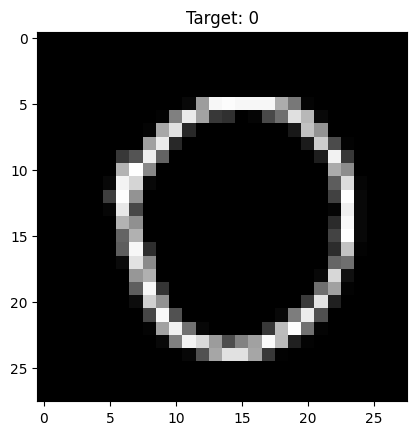

In [2]:
# Definir n m e r o de ejemplos
n_samples = 20000
# vamos a omitir class que es nuestro target o valor deseado
x = np.asanyarray(data)[: n_samples ,:]
y = np.asanyarray(mnist.target)[: n_samples ].ravel()

# Dibujar un ejemplo de manera aleatoria
sample = np.random.randint(n_samples)
plt.imshow(x[sample].reshape((28 ,28)), cmap=plt.cm.gray)
plt.title('Target: %s' % y[sample ])
plt.show()

In [11]:
# Separar conjuntos de entrenamiento y prueba
xtrain , xtest , ytrain , ytest = train_test_split (x, y, test_size =0.1)
# Instanciar el Pipeline
components = 200
model = Pipeline ([
('PCA', PCA( n_components=components)) ,
('scaler', StandardScaler ()),
('SVM', svm.SVC(gamma=0.0001))])
model.fit(xtrain , ytrain)

# Aplicar metrica al modelo
print('Train: ', model.score(xtrain , ytrain ))
print('Test: ', model.score(xtest , ytest ))

# Hacer predicciones del test
ypred = model.predict(xtest)

Train:  0.8932222222222223
Test:  0.8645


Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       204
           1       0.86      0.97      0.91       218
           2       0.93      0.82      0.87       207
           3       0.85      0.82      0.83       227
           4       0.81      0.94      0.87       159
           5       0.83      0.81      0.82       184
           6       0.89      0.93      0.91       201
           7       0.91      0.85      0.88       193
           8       0.89      0.72      0.80       206
           9       0.77      0.84      0.80       201

    accuracy                           0.86      2000
   macro avg       0.87      0.87      0.86      2000
weighted avg       0.87      0.86      0.86      2000



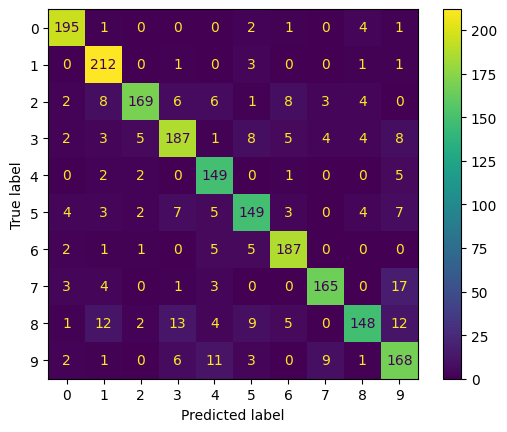

In [13]:
# Reporte de C l a s i f i c a c i n
print('Classification report: \n', metrics.classification_report(ytest, ypred))

# Matrix de Confusion
# print('Confusion matrix: \n', metrics.confusion_matrix(ytest, ypred))

cm = metrics.confusion_matrix(ytest, ypred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
name = f'Confusion_Matrix_{components}.eps'
disp.figure_.savefig(fname=name, format='eps')

# sample = np.random.randint(xtest.shape [0])
# plt.imshow(xtest[sample ].reshape ((28 ,28)), cmap=plt.cm.gray)
# plt.title('Prediction: %s' % ypred[sample])
# plt.show()